### This mini-project helps you to understand data and structure the data, transform the data and visualize using matplotlib. The data used for this case study is Urban accidents in various states of India.

Source: Data from Govt of India
Period: 2007 to 2017
Population: Wikipedia, according to census since urban population is not part of the accident data.

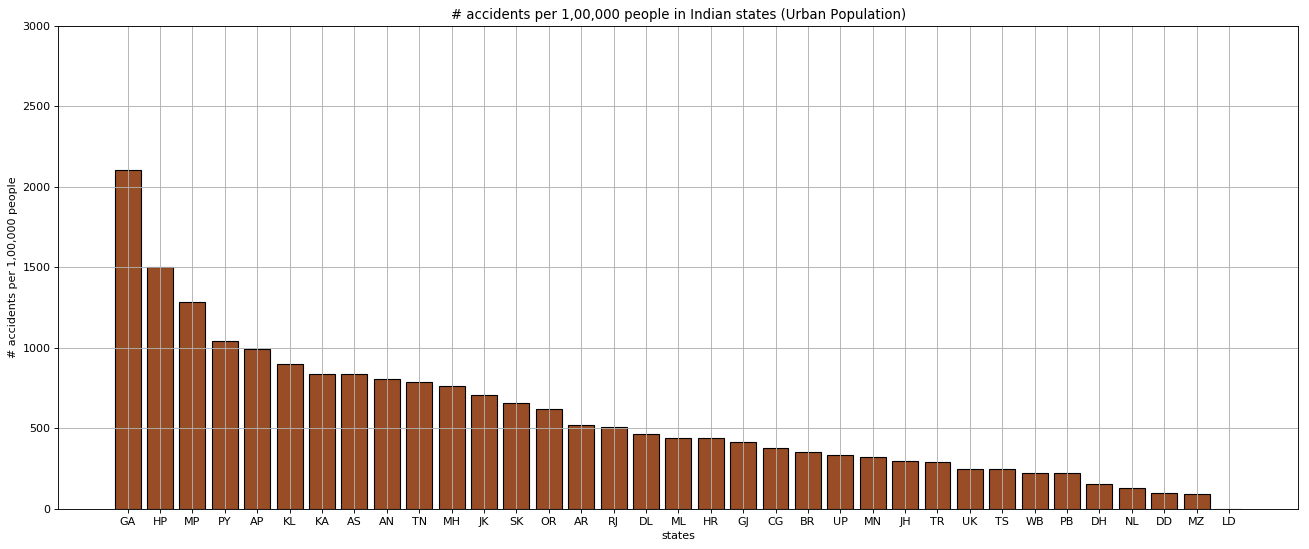

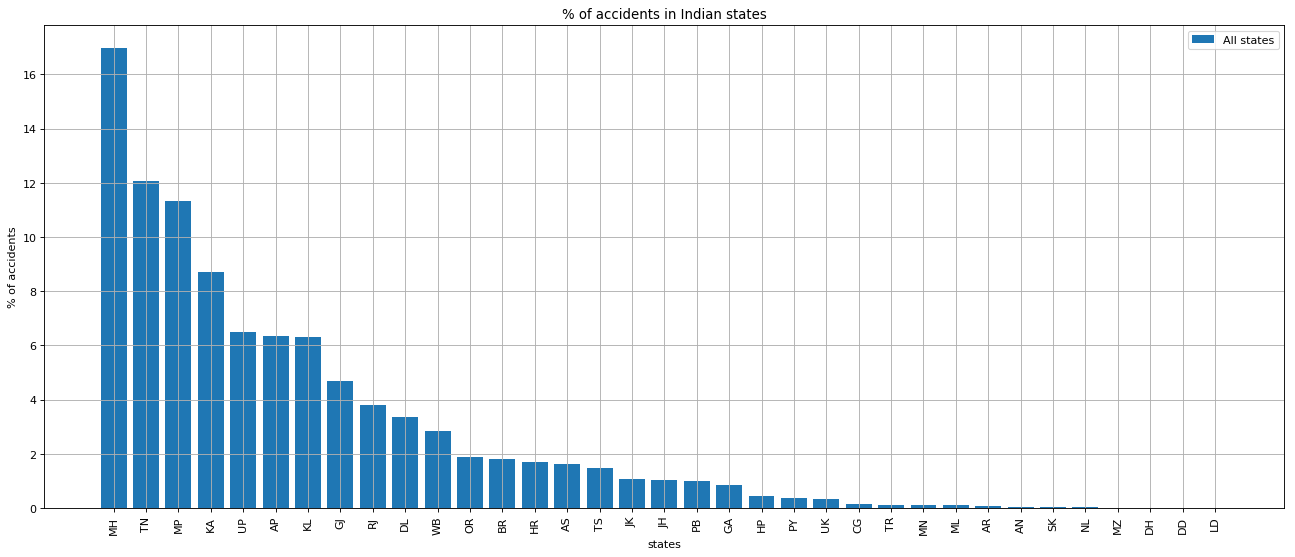

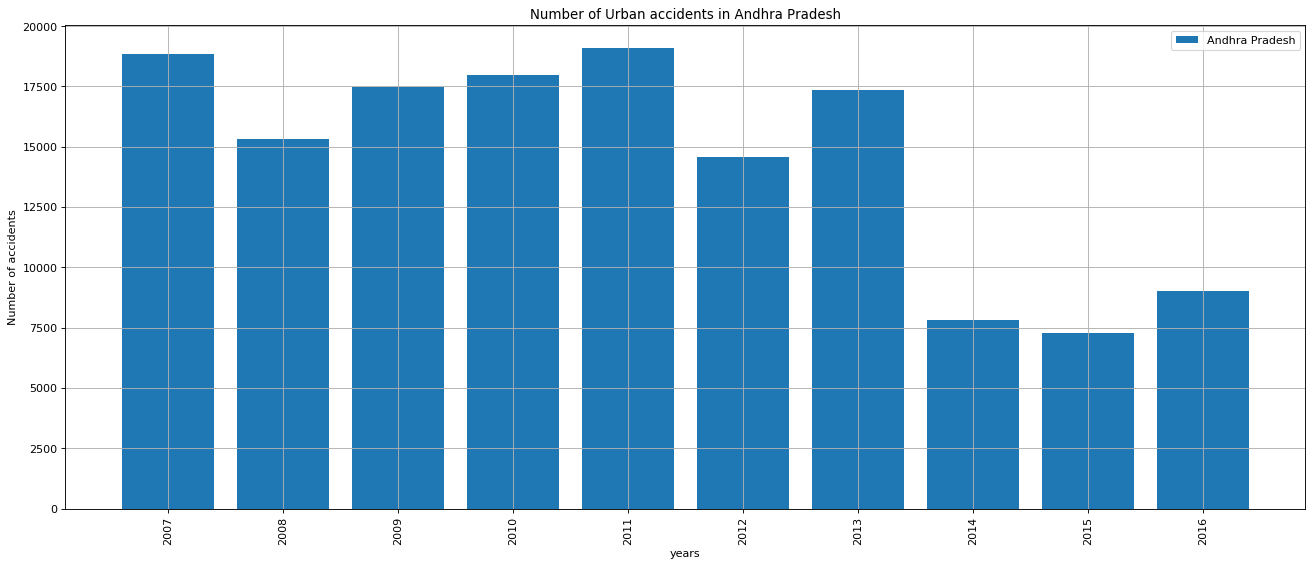

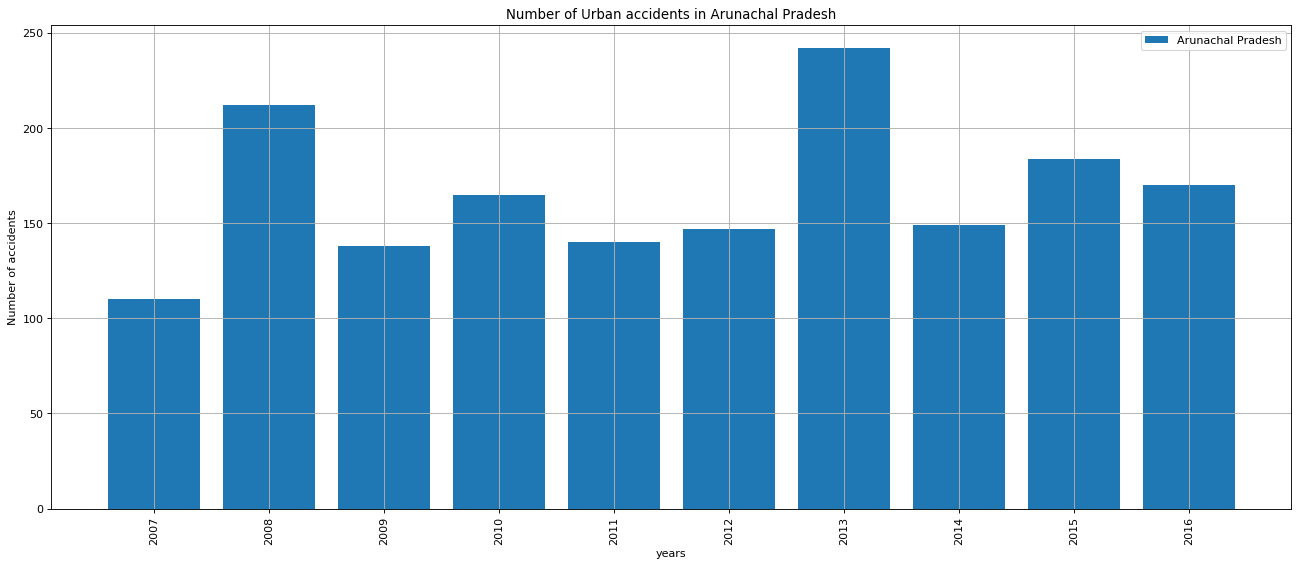

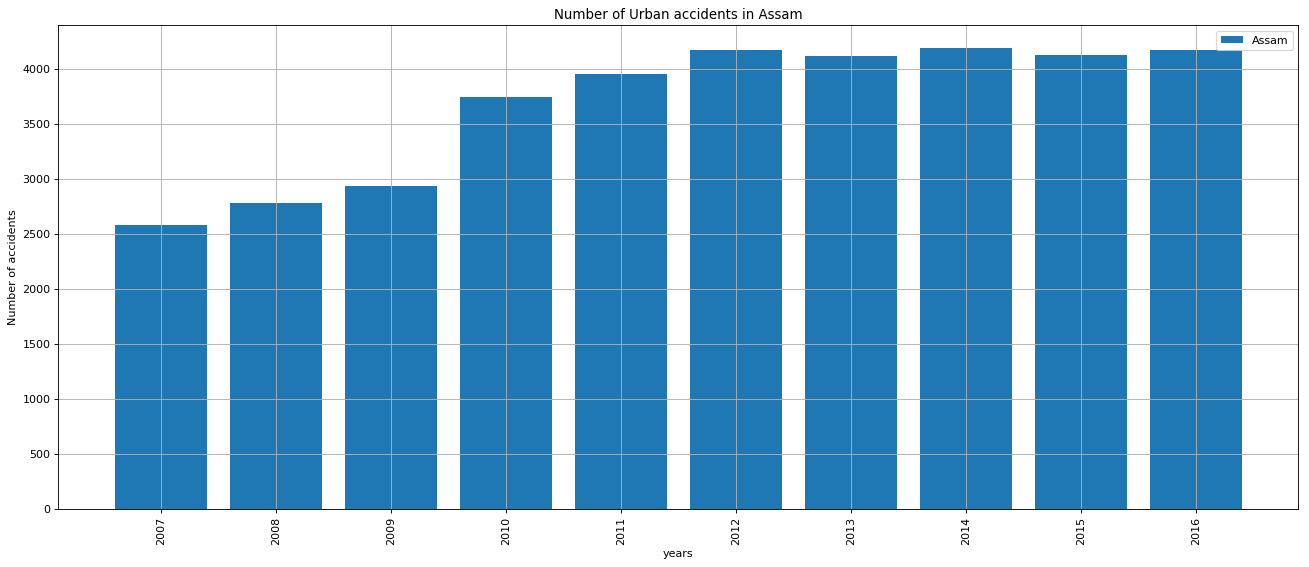

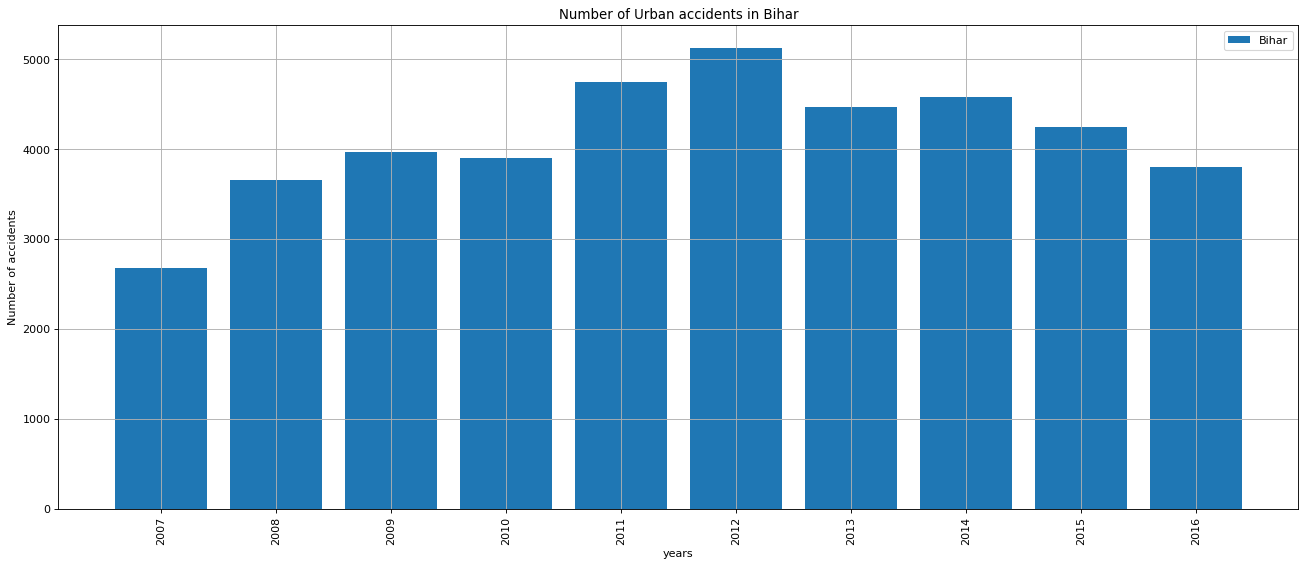

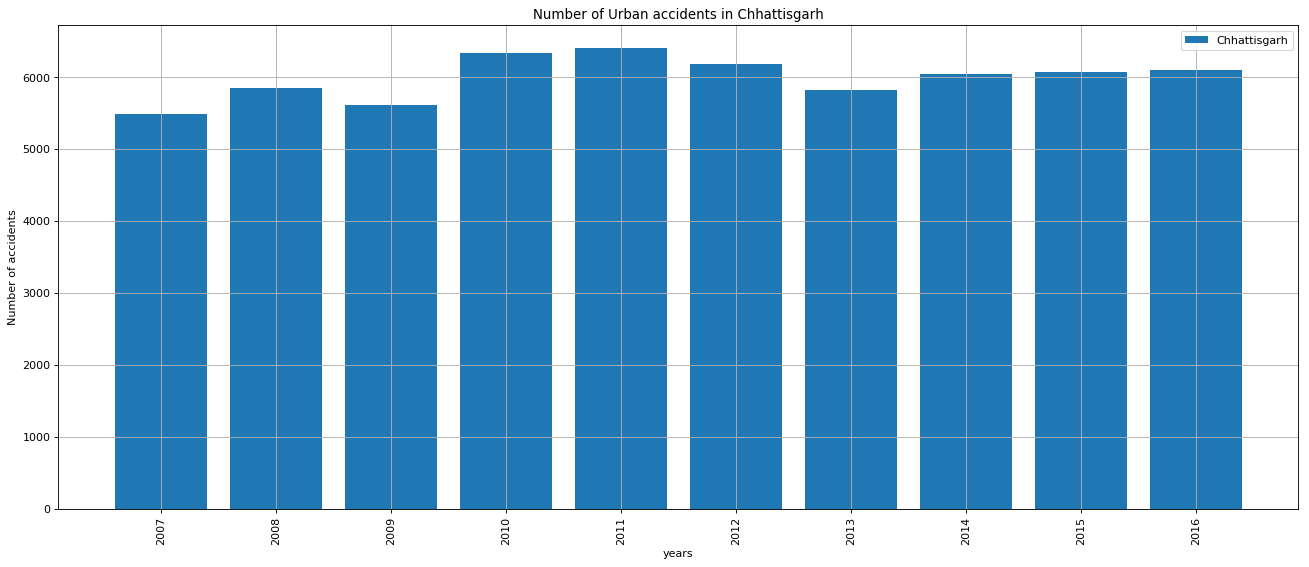

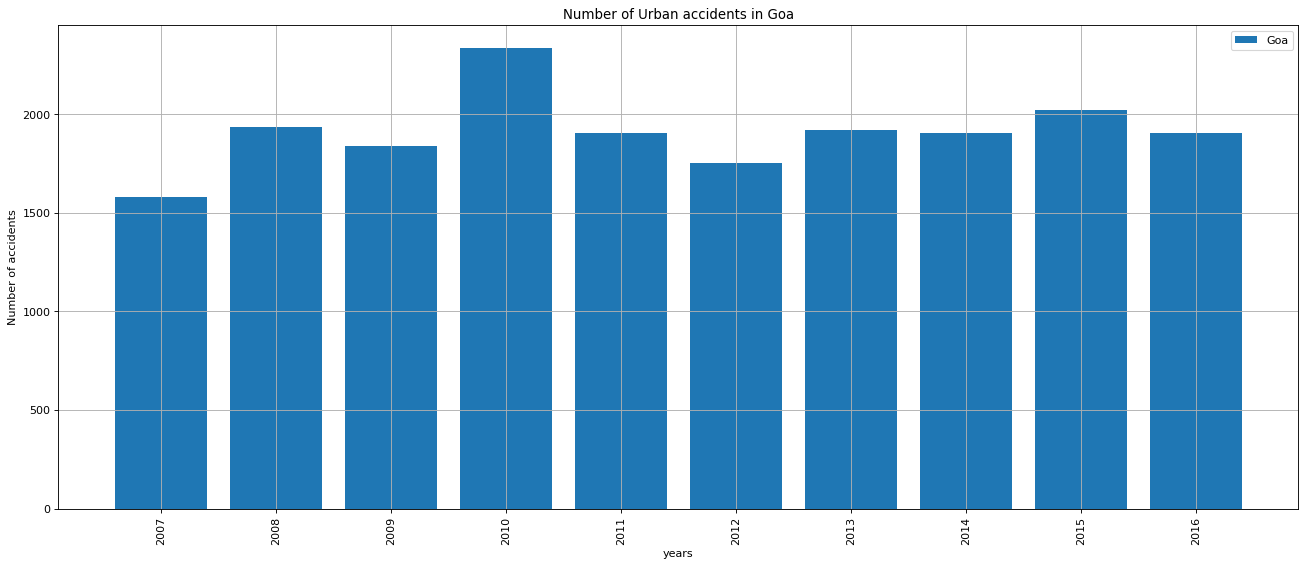

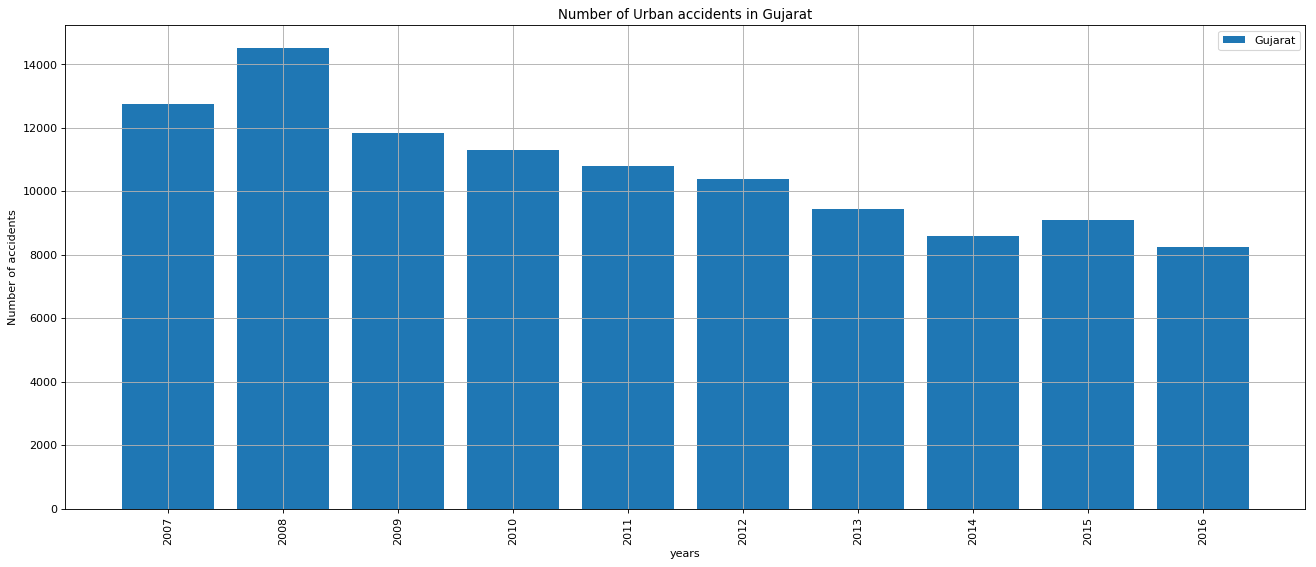

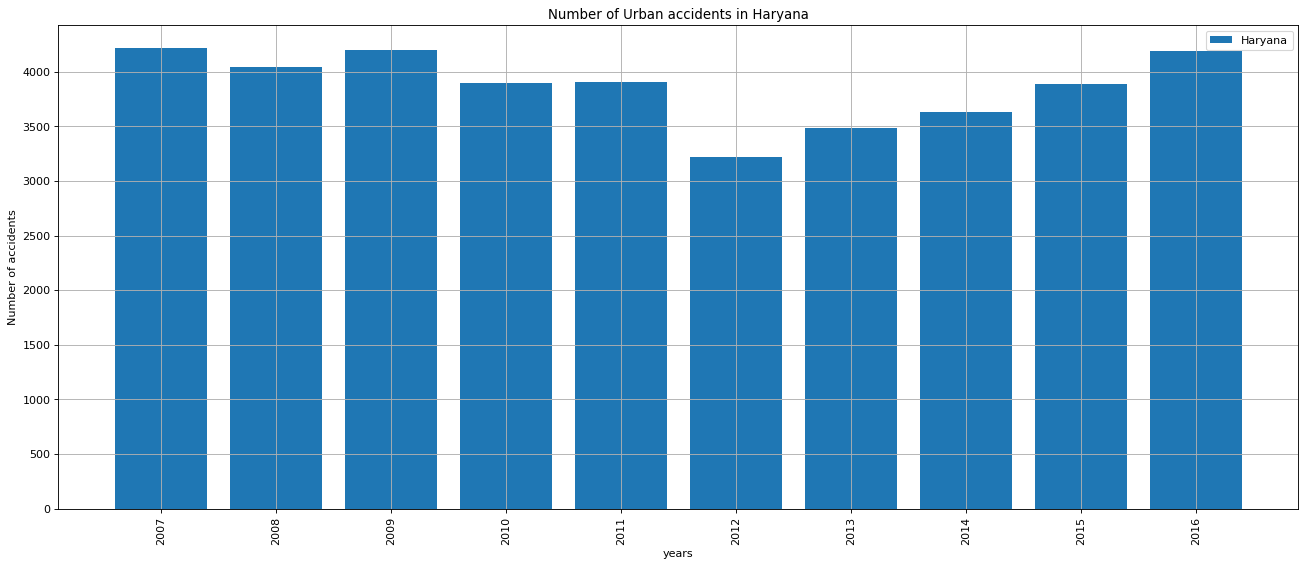

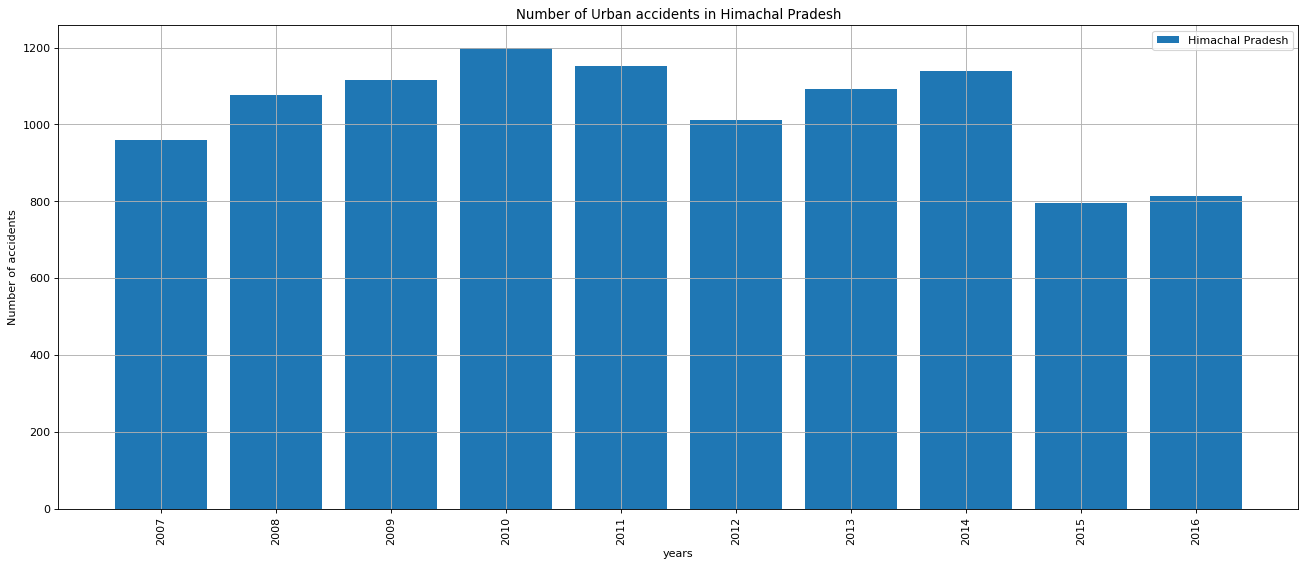

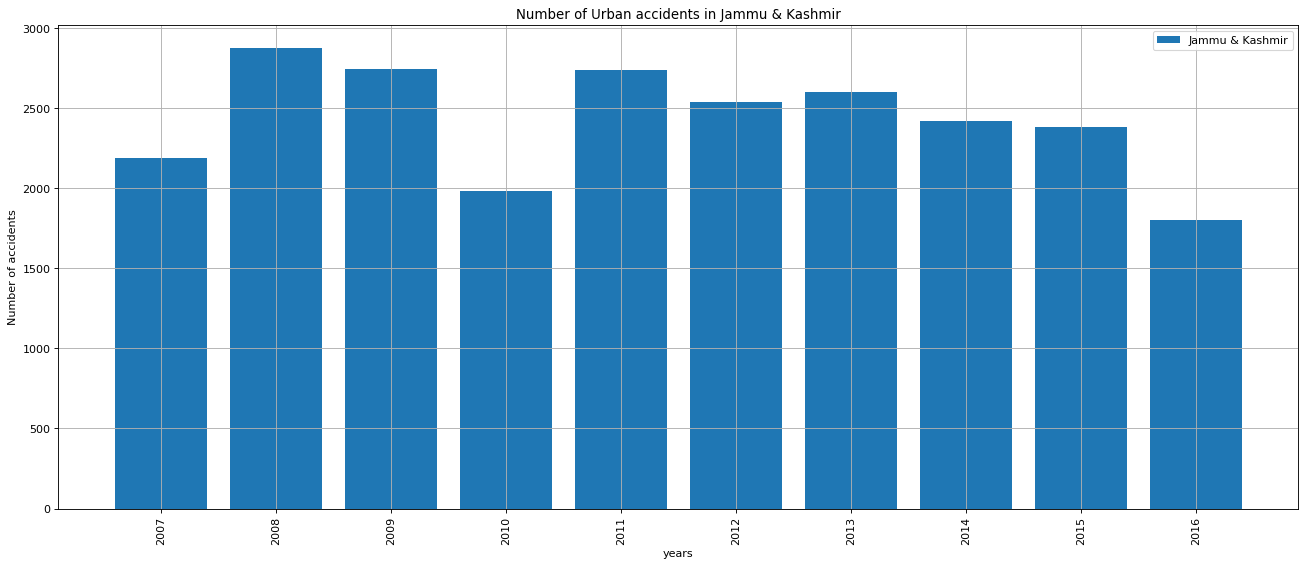

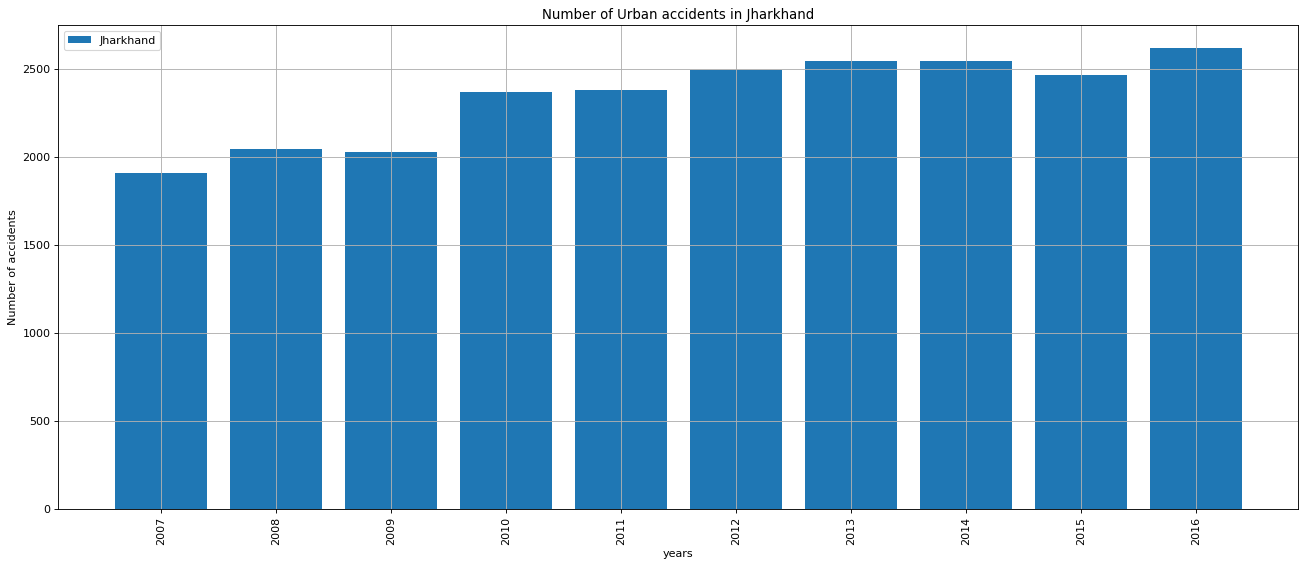

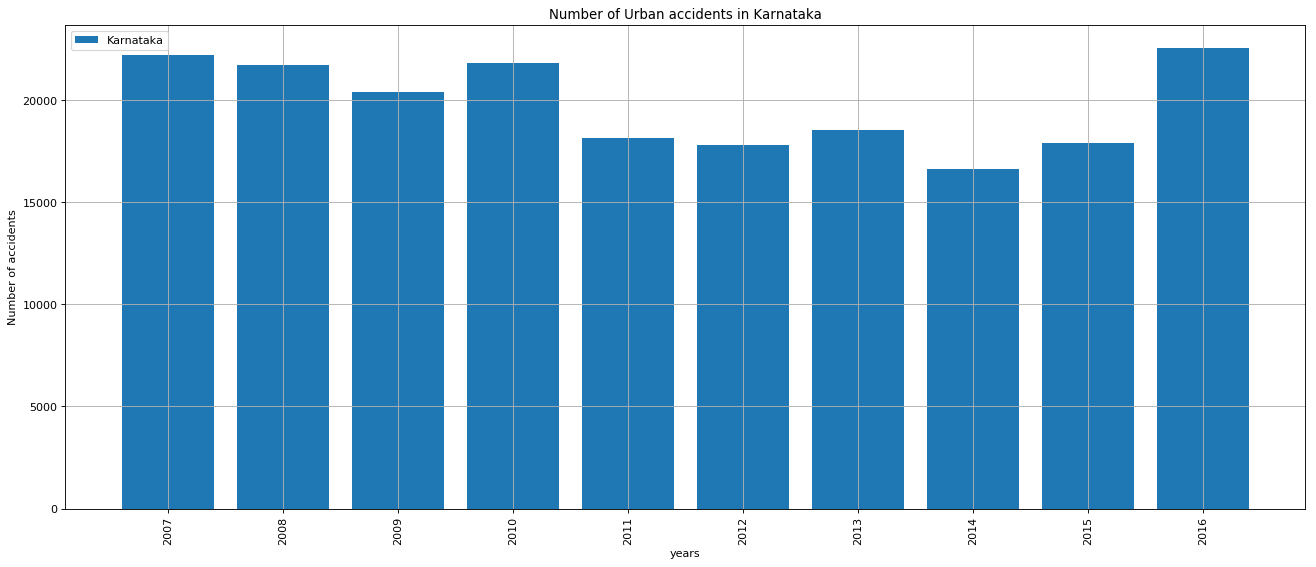

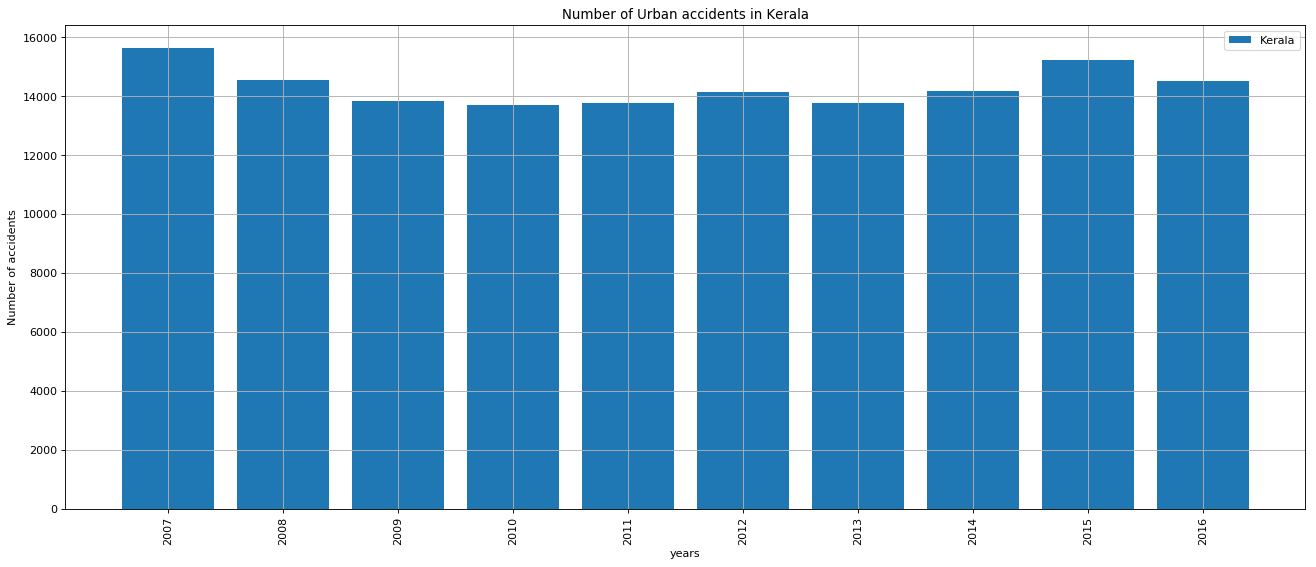

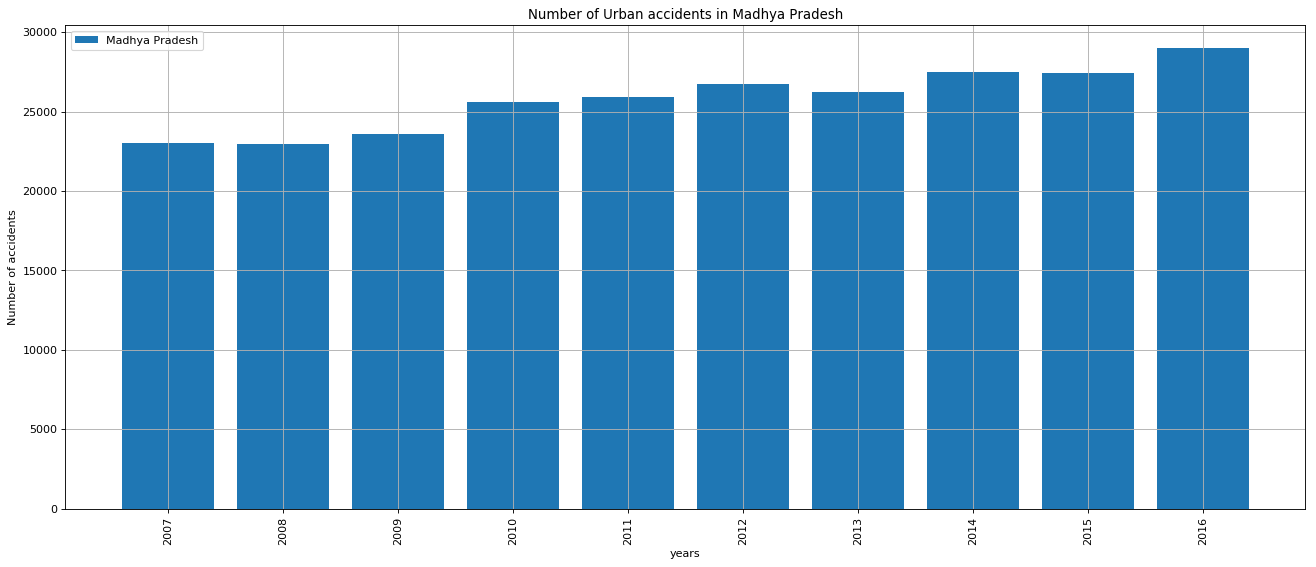

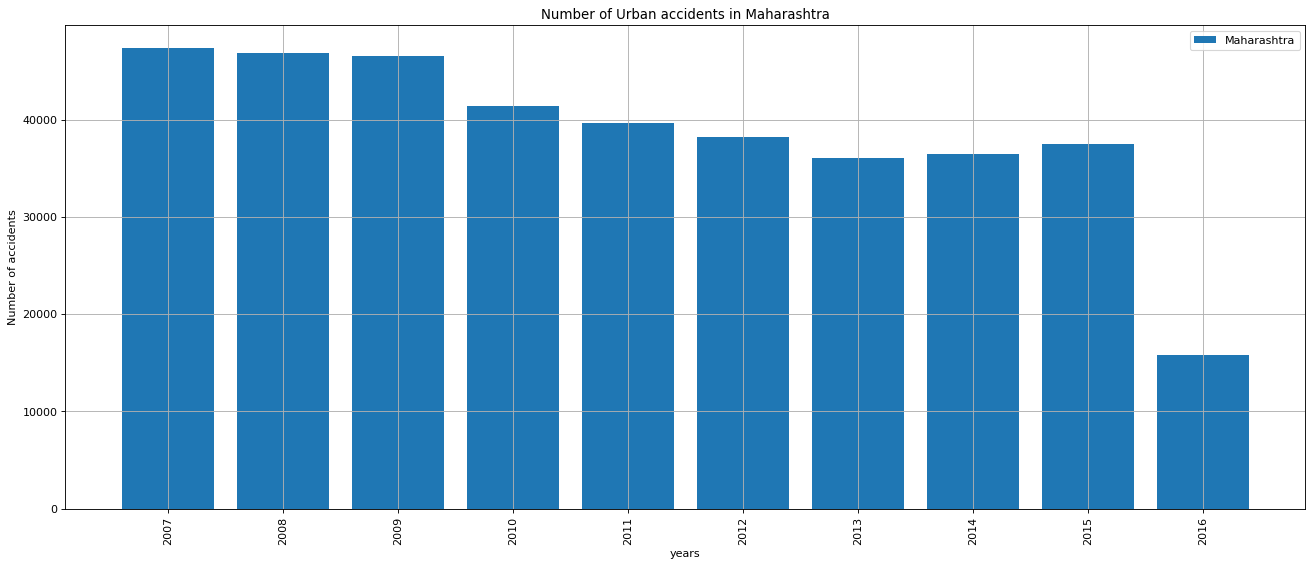

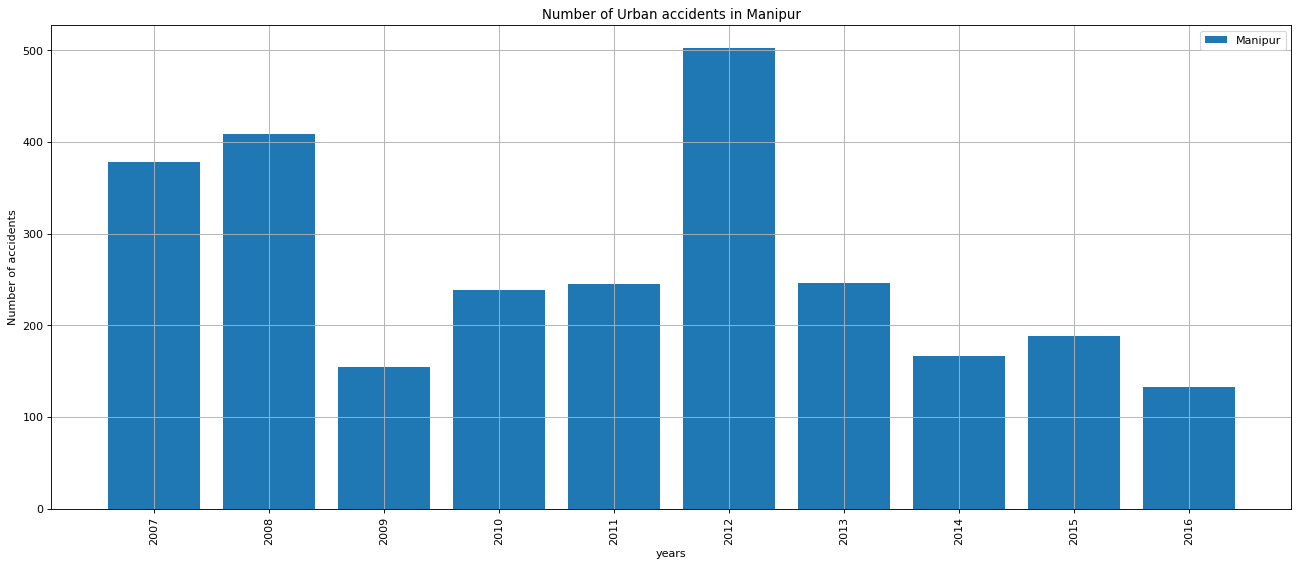

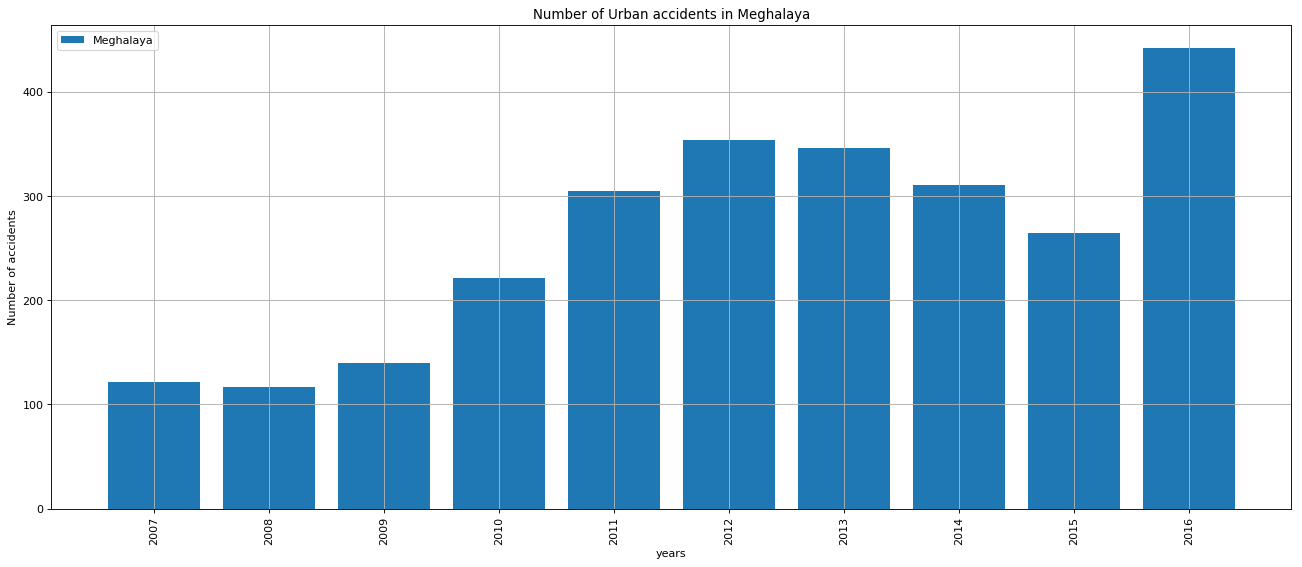

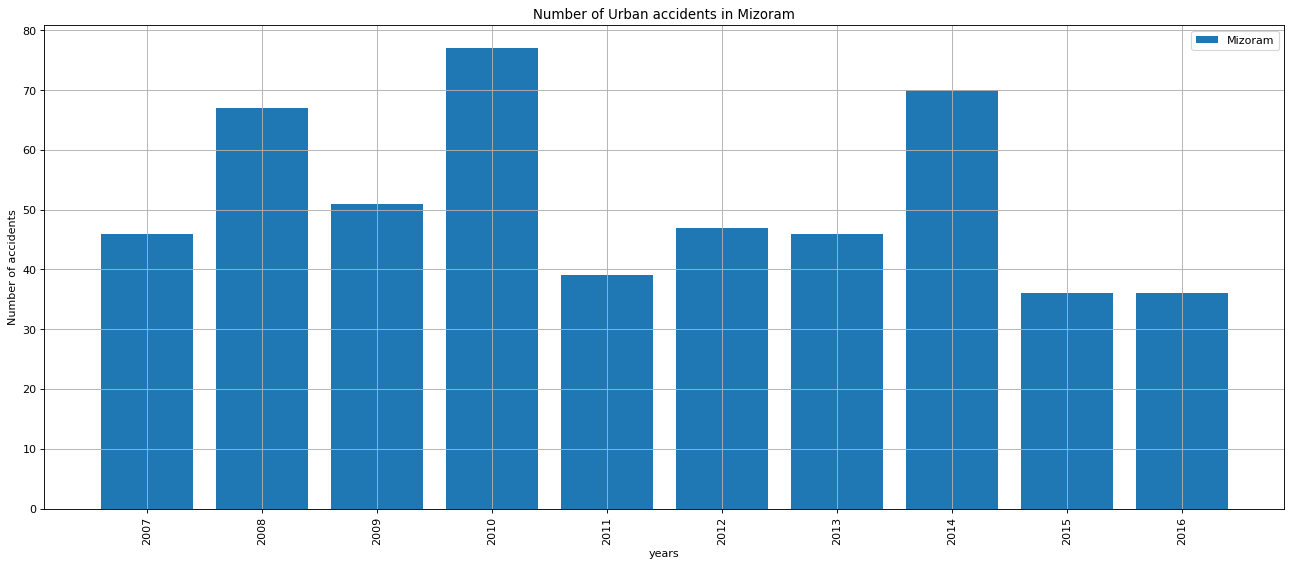

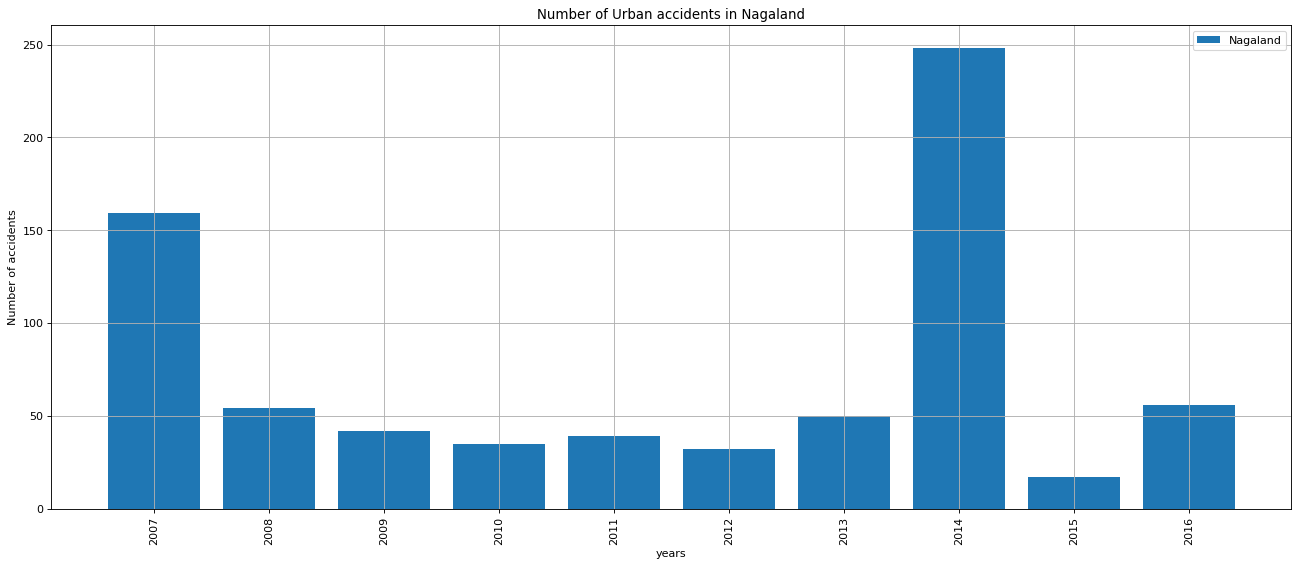

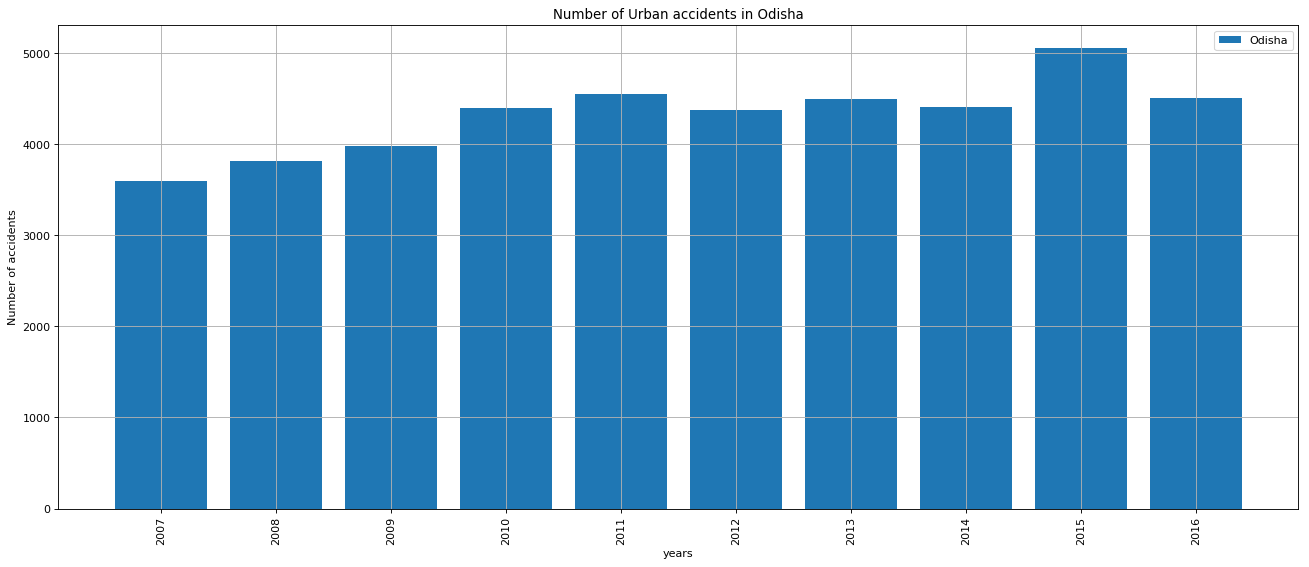

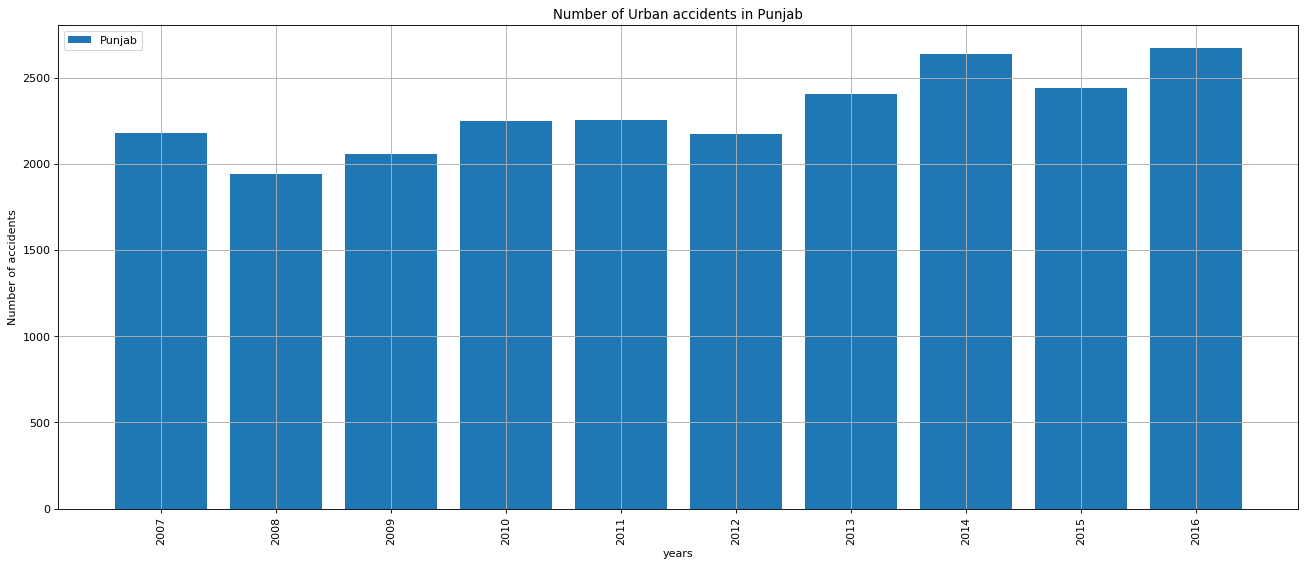

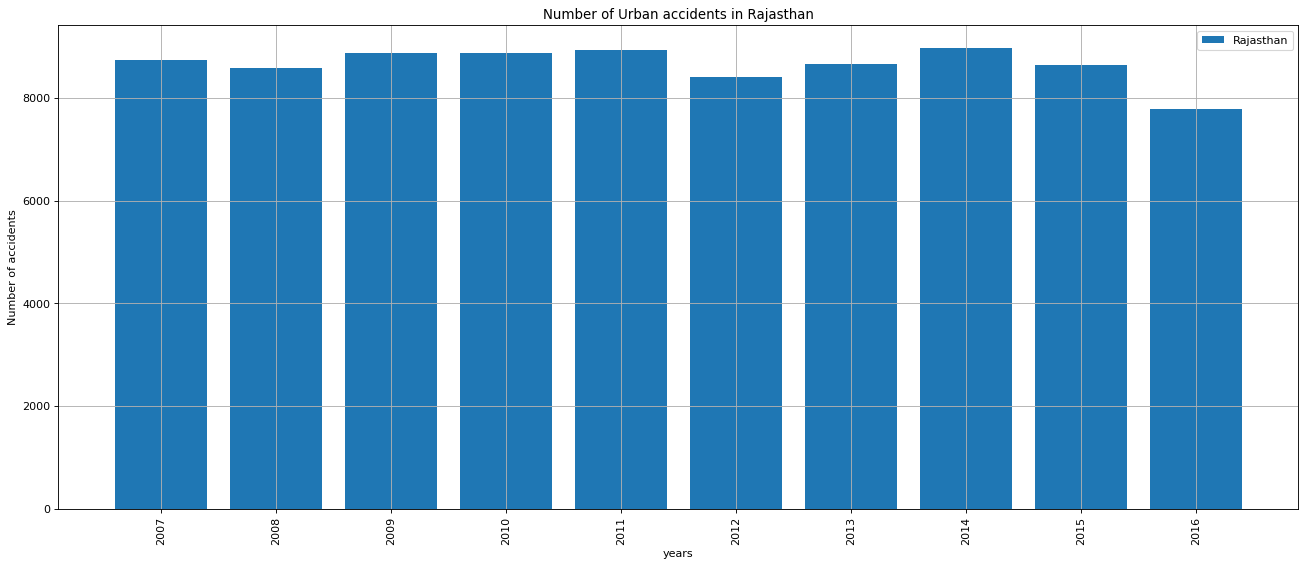

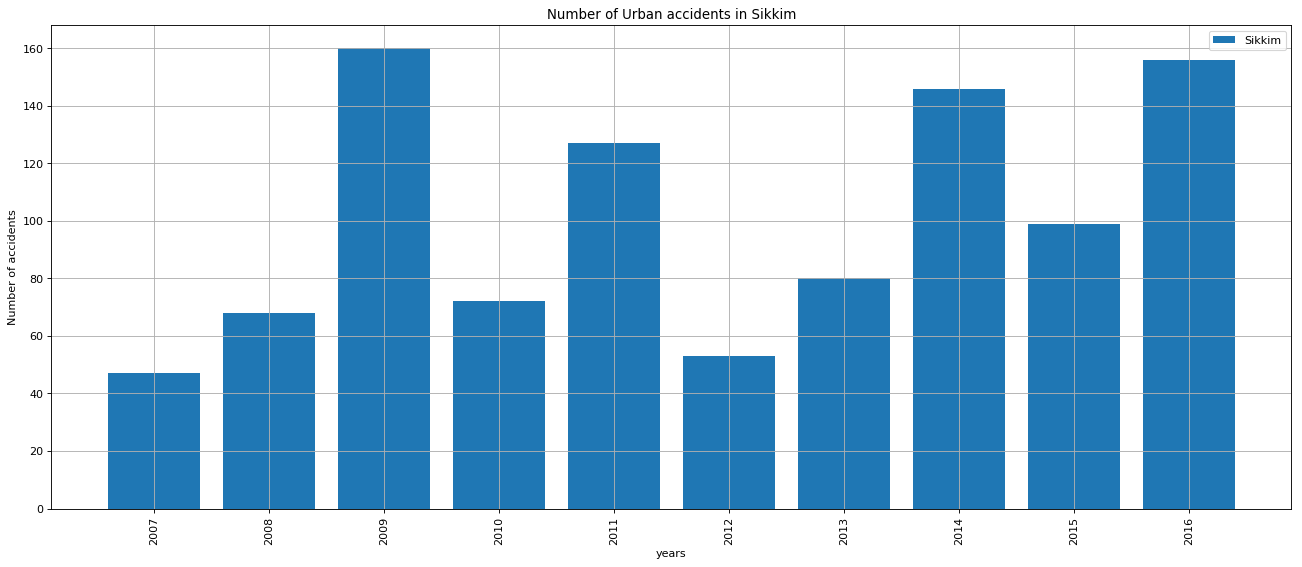

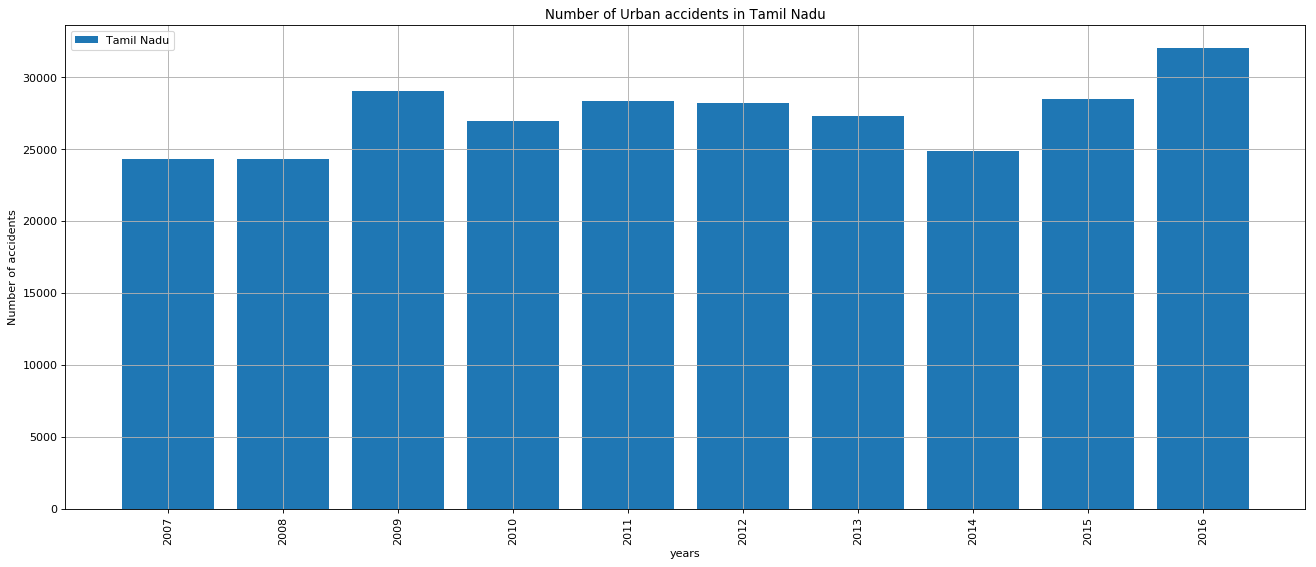

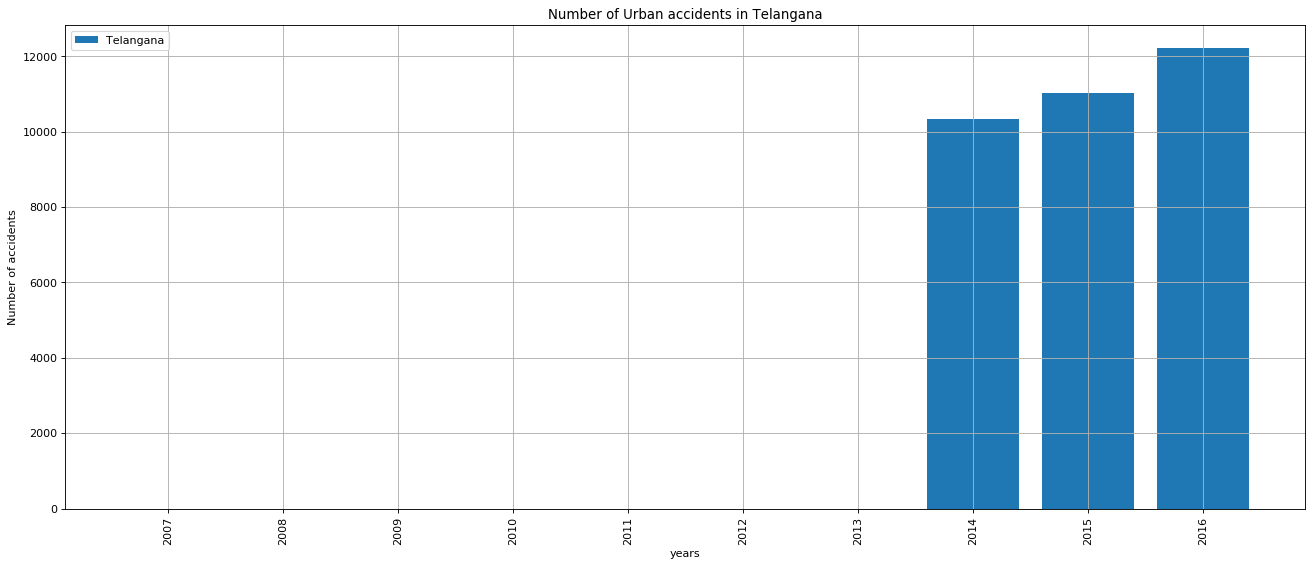

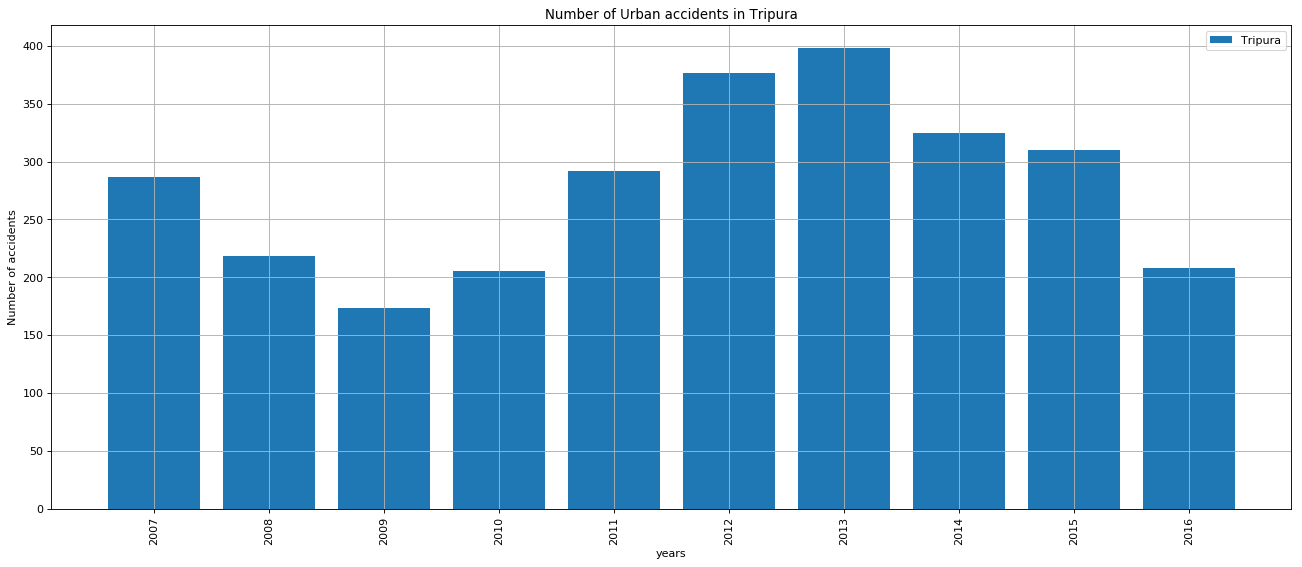

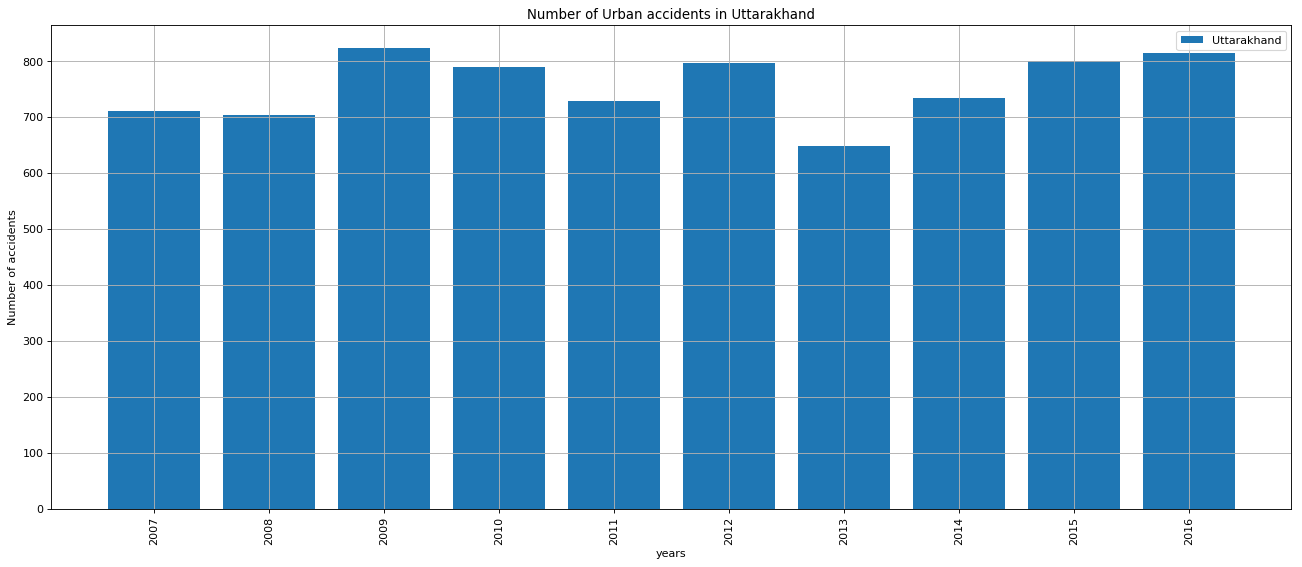

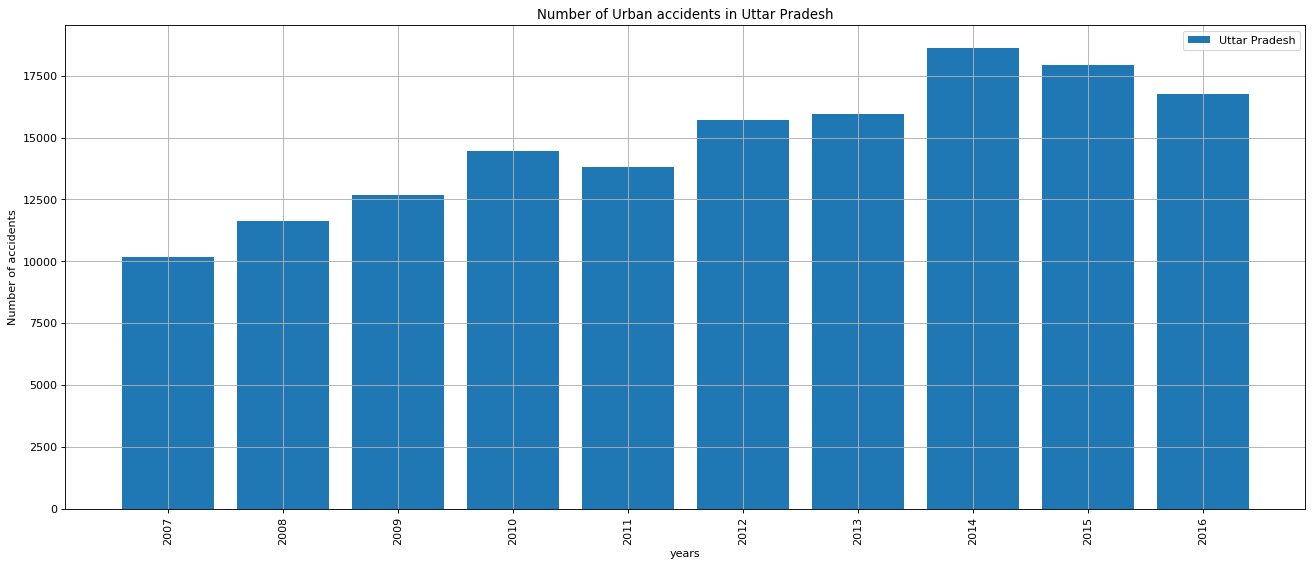

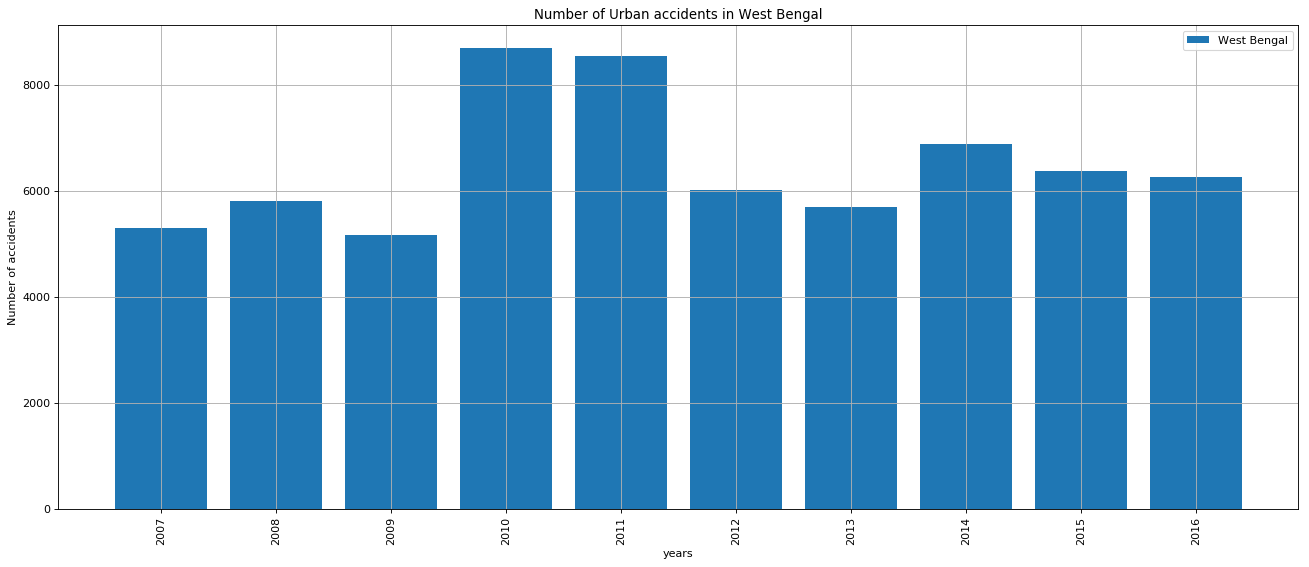

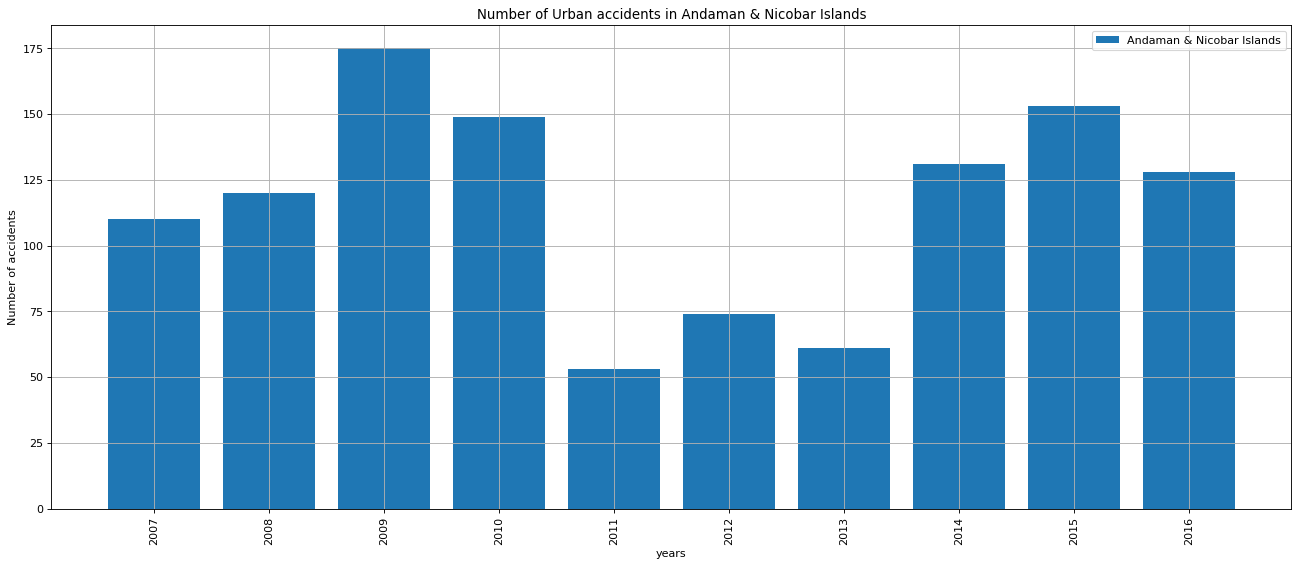

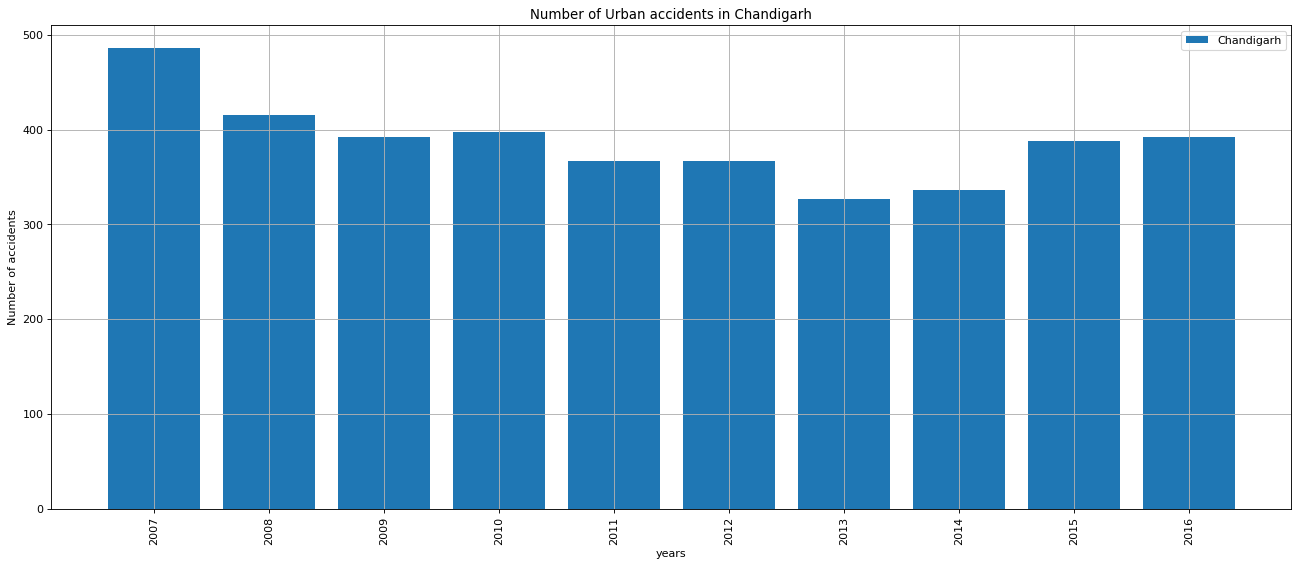

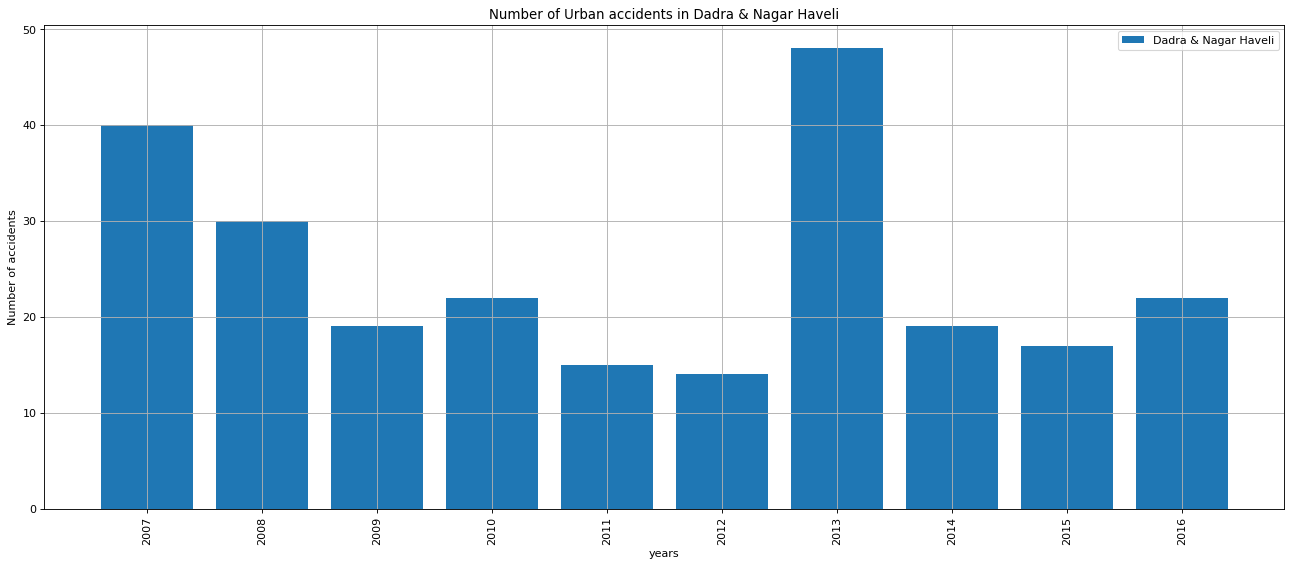

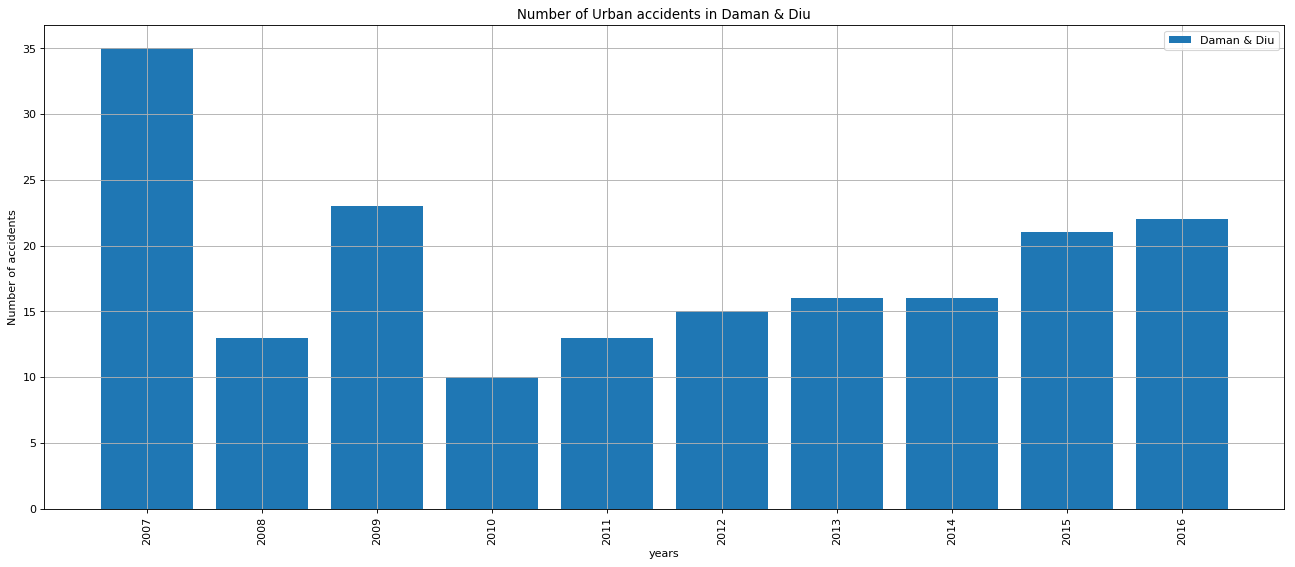

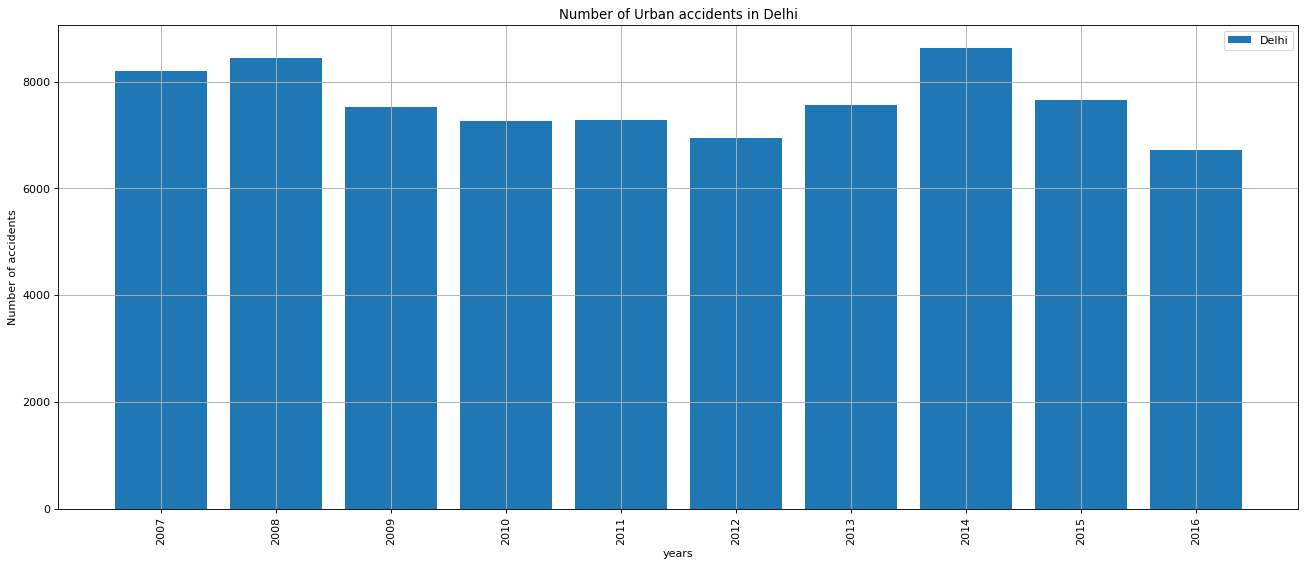

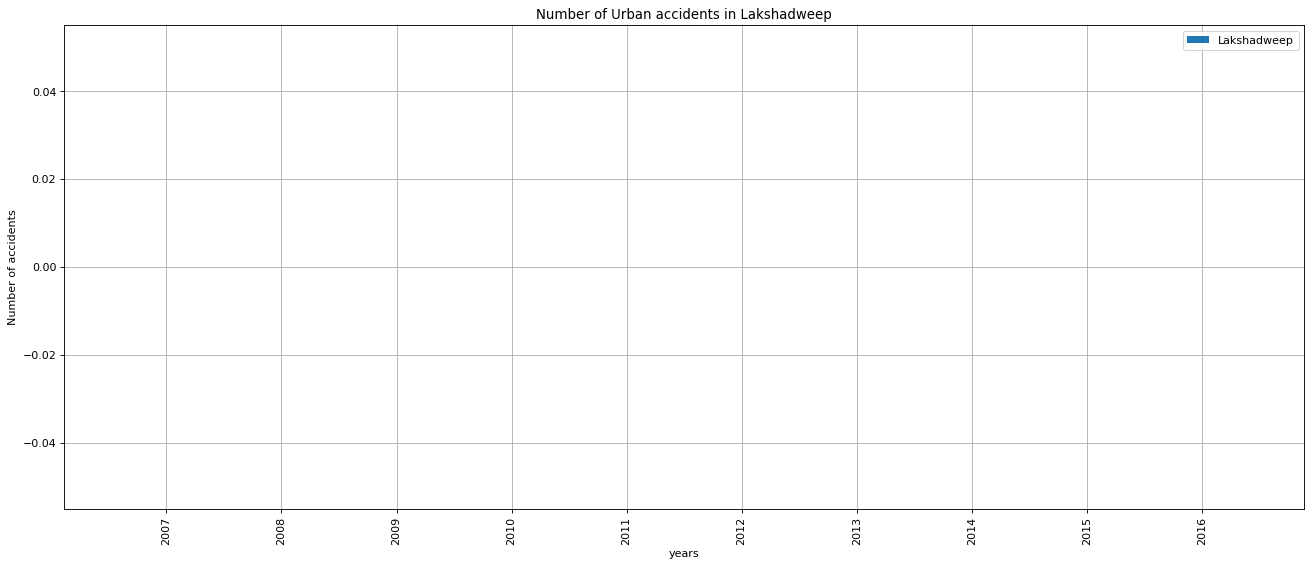

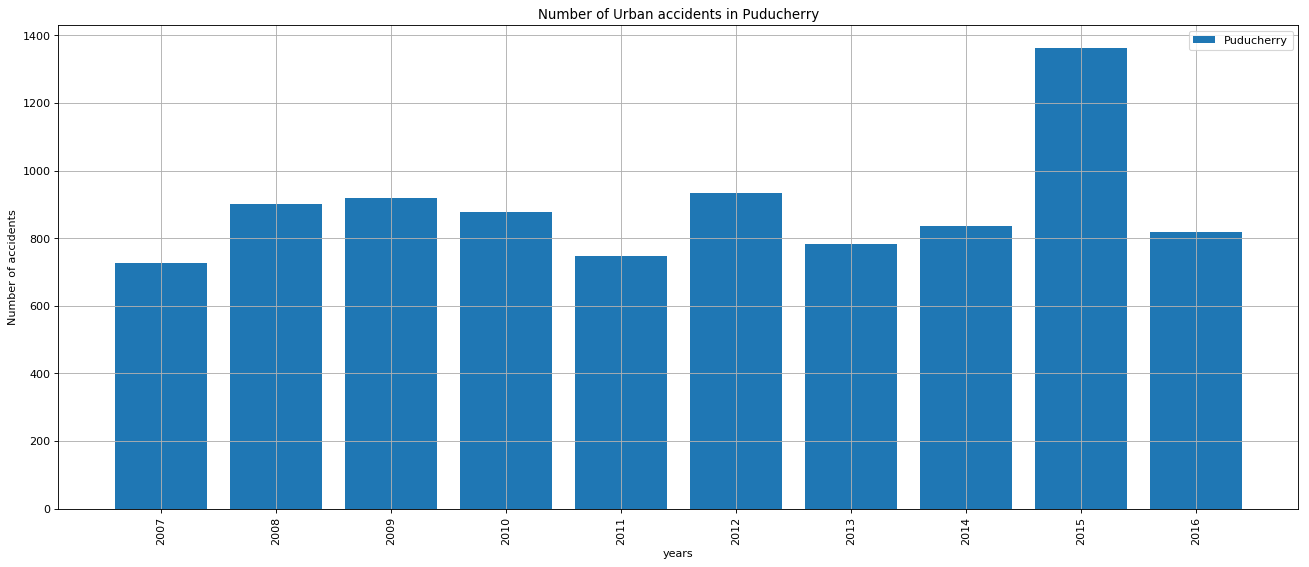

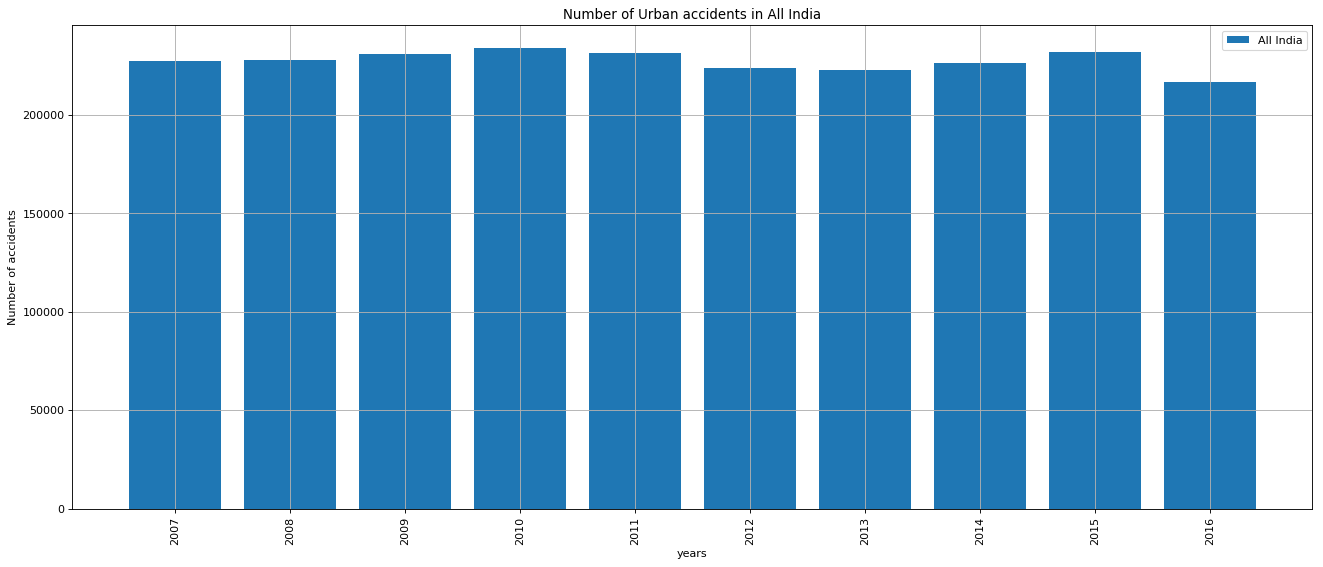

In [2]:
"""Analysis and Visualization of Urban accident 
Visit us - GeeksHub.in to know more
"""
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

FILE_NAME = "Urban_Total_Accidents_2006-16_more.csv"

states_map = {'Andhra Pradesh': 'AP', 'Arunachal Pradesh': 'AR',
              'Assam': 'AS', 'Bihar': 'BR', 'Chhattisgarh': 'CG',
              'Goa': 'GA', 'Gujarat': 'GJ', 'Haryana': 'HR',
              'Himachal Pradesh': 'HP', 'Jammu & Kashmir': 'JK',
              'Jharkhand': 'JH', 'Karnataka': 'KA', 'Kerala': 'KL',
              'Madhya Pradesh': 'MP', 'Maharashtra': 'MH', 
              'Manipur': 'MN', 'Meghalaya': 'ML', 'Mizoram': 'MZ',
              'Nagaland': 'NL', 'Odisha': 'OR', 'Punjab': 'PB',
              'Rajasthan': 'RJ', 'Sikkim': 'SK', 'Tamil Nadu': 'TN',
              'Telangana': 'TS', 'Tripura': 'TR', 'Uttarakhand': 'UK',
              'Uttar Pradesh': 'UP', 'West Bengal': 'WB',
              'Andaman & Nicobar Islands': 'AN', 'Chandigarh': 'CG',
              'Dadra & Nagar Haveli': 'DH', 'Daman & Diu': 'DD', 
              'Delhi': 'DL', 'Lakshadweep': 'LD', 'Puducherry': 'PY'}

def percentage_of_accidents_by_urban_population(states_data):
    total_weight_percent = 0
    states = dict()
    total = sum(list(states_data['All India'].values())[3:])
    all_total_population = states_data['All India']['Total Population']
    all_urban_population = states_data['All India']['Urban Population']
    
    for state, value in states_data.items():
        total_population = value['Total Population']
        urban_population = value['Urban Population']
        
        if state == 'All India':
            continue
        weight_percent = (sum(list(value.values())[3:]))/(urban_population/1_000_00)
        states[states_map[state]] = weight_percent
    
    states = dict(sorted(states.items(), key=lambda k: k[1], reverse=True))
        
    figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
    axes = plt.gca()
    axes.set_ylim([0,3000])
    plt.ylabel('# accidents per 1,00,000 people')
    plt.xlabel('states')
    plt.grid(True)
    plt.title(f"# accidents per 1,00,000 people in Indian states (Urban Population)")
    x = tuple(states.keys())
    y = tuple(states.values())
    plt.bar(x, y, label='All states', color=(0.6, 0.3, 0.15, 1), edgecolor='black')    
    
def percentage_of_accidents(states_data):
    states = dict()
    total = sum(list(states_data['All India'].values())[3:])
    for state, value in states_data.items():
        if state == 'All India':
            continue
        states[states_map[state]] = (sum(list(value.values())[3:]) * 100) / total
    
    states = dict(sorted(states.items(), key=lambda k: k[1], reverse=True))
    
    figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('% of accidents')
    plt.xlabel('states')
    plt.grid(True)
    plt.title(f"% of accidents in Indian states")
    x = tuple(states.keys())
    y = tuple(states.values())
    plt.bar(x, y, label='All states')
    plt.xticks(rotation='vertical')    
        
    plt.legend()
    plt.show()    
    
def plot_state(state, x, y):
    figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Number of accidents')
    plt.xlabel('years')
    plt.grid(True)
    plt.title(f"Number of Urban accidents in {state}")
    
    x = tuple(x)
    y = tuple(y)
    plt.bar(x, y, label=state)
    plt.xticks(rotation='vertical')
        
    plt.legend()
    plt.show()
    
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return 0
    
with open(FILE_NAME) as csv_file:
    states_dict = dict()
    headers = csv_file.readline().strip().split(',')[1:]
    for line in csv_file:
        row_data = line.strip().split(',')
        state = row_data[0]
        row_data = [convert_to_int(value) for value in row_data[1:]]
        states_dict[state] = {column_name: column_data for column_name, column_data in zip(headers, row_data)}
        
percentage_of_accidents_by_urban_population(states_dict)
percentage_of_accidents(states_dict)

for state, data in states_dict.items():
      plot_state(state, list(data.keys())[3:], list(data.values())[3:])